# Paired Sample T-test
reference:  https://www.youtube.com/watch?v=8aaIdXENNJI

We first establish the population.

We then sample from that population. The sampling is done such that the data IS paired (samples tak4en from same entity).

We then perform the **Paired** T-Test.

The null hypothesis is they are the same distribution.  Our hope is to reject the null from which we can conclude they are different distributions.

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_rel

In [39]:
%matplotlib inline
np.random.seed(8)
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()

In [40]:
import pandas as pd
df_population = pd.read_csv('dataset\\Data-sets\\blood_pressure.csv')

In [61]:
sample_size = 120
sample_size = 5

# paired data...
df_temp = df_population.sample(n=sample_size, frac=None, replace=False, weights=None, random_state=None, axis=None)
df = df_temp[['bp_before', 'bp_after']]

,bp_before,bp_after
13,145,159
85,154,146
66,154,134
35,159,171
52,172,175


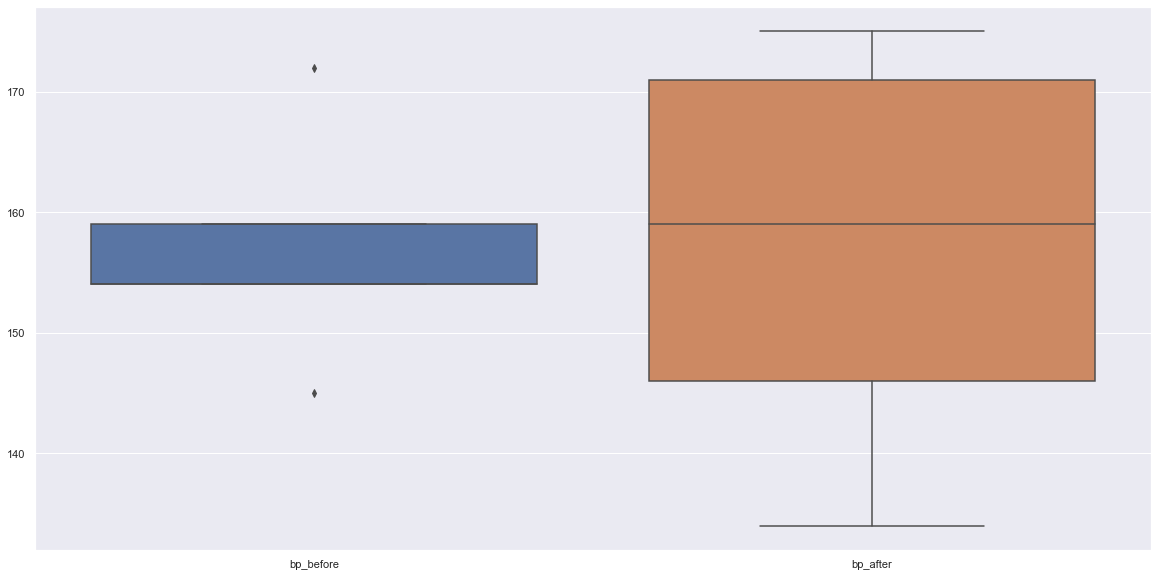

In [62]:
# check for outliers
plt.figure()
ax = sns.boxplot(data=df)

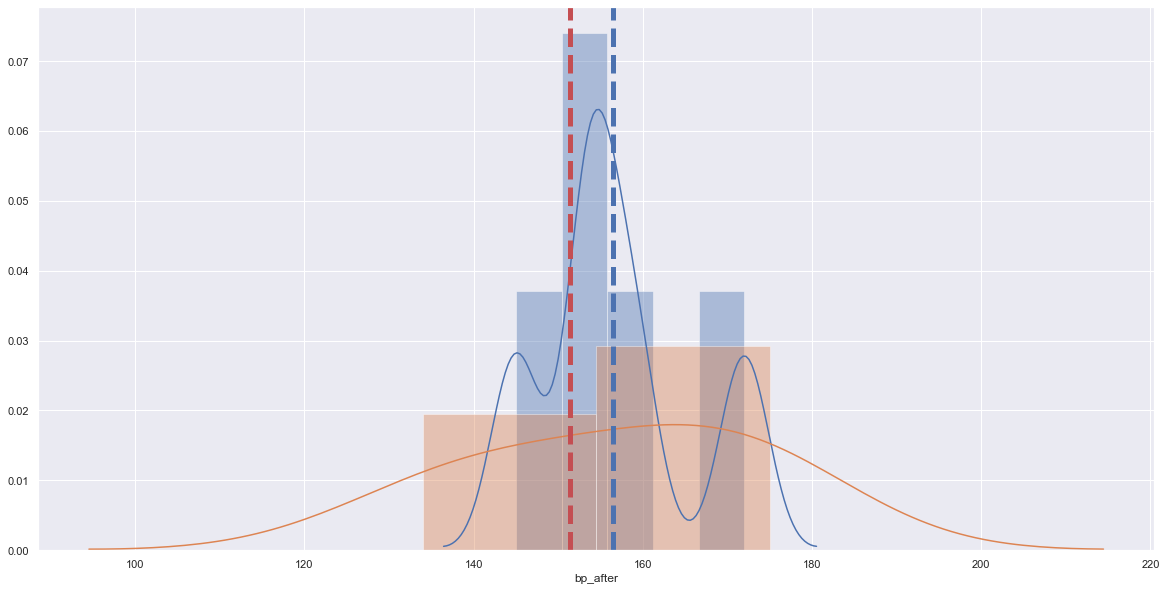

In [63]:
plt.figure()
ax1 = sns.distplot(df['bp_before'])
ax2 = sns.distplot(df['bp_after'])
plt.axvline(np.mean(before), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(after),  color='r', linestyle='dashed', linewidth=5)

In [64]:
# perform **paired** t-test to determine if they are different or the same...
# if your p-value is greater than alpha then you fail to reject the hypothesis
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_rel(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if (p > alpha):
        print('(p > alpha)... Same distributions (fail to reject H0)')
    else:
        print('(p < alpha)... Different distributions (reject H0)')
    print('Sample size=%d' % (sample_size))

In [65]:
alpha = 0.05
compare_2_groups(df['bp_before'], df['bp_after'], alpha, sample_size)

Statistics=-0.031, p=0.976
(p > alpha)... Same distributions (fail to reject H0)
Sample size=5
